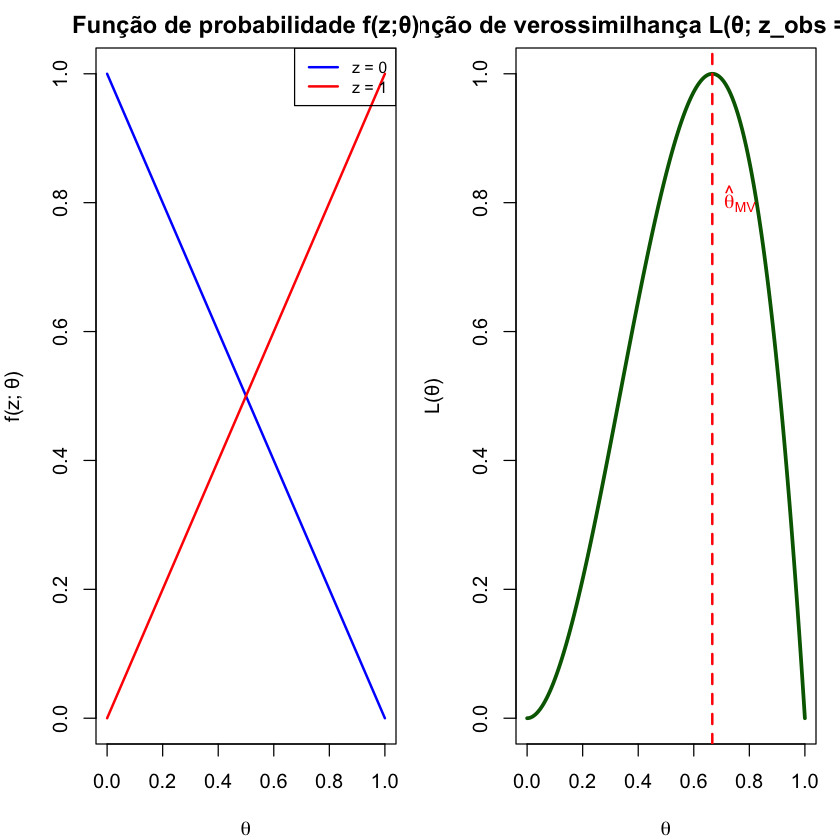

In [1]:
# ================================
# 1. Definir parâmetros e dados
# ================================
theta <- seq(0, 1, length.out = 200)
z_values <- c(0, 1)   # possíveis valores da Bernoulli
z_obs <- c(1, 0, 1)   # dados observados
n <- length(z_obs)

# ================================
# 2. Função de probabilidade f(z; theta)
# ================================
f_z0 <- (1 - theta)     # f(z=0; theta)
f_z1 <- theta           # f(z=1; theta)

# ================================
# 3. Função de verossimilhança L(theta; z_obs)
# ================================
# produto das probabilidades dos dados observados
n1 <- sum(z_obs)
L <- theta^n1 * (1 - theta)^(n - n1)
L <- L / max(L)  # normaliza para escalar no mesmo gráfico

# ================================
# 4. Plotar f(z; theta)
# ================================
par(mfrow=c(1,2), mar=c(4,4,2,1))

plot(theta, f_z0, type="l", col="blue", lwd=2, ylim=c(0,1),
     xlab=expression(theta), ylab="f(z; θ)",
     main="Função de probabilidade f(z;θ)")
lines(theta, f_z1, col="red", lwd=2)
legend("topright", legend=c("z = 0", "z = 1"),
       col=c("blue","red"), lwd=2, cex=0.8)

# ================================
# 5. Plotar L(theta; z_obs)
# ================================
plot(theta, L, type="l", col="darkgreen", lwd=3,
     xlab=expression(theta), ylab="L(θ)",
     main=paste0("Função de verossimilhança L(θ; z_obs = [",
                 paste(z_obs, collapse=", "), "])"))
abline(v = mean(z_obs), col="red", lwd=2, lty=2)
text(mean(z_obs), 0.8, expression(hat(theta)[MV]), pos=4, col="red")

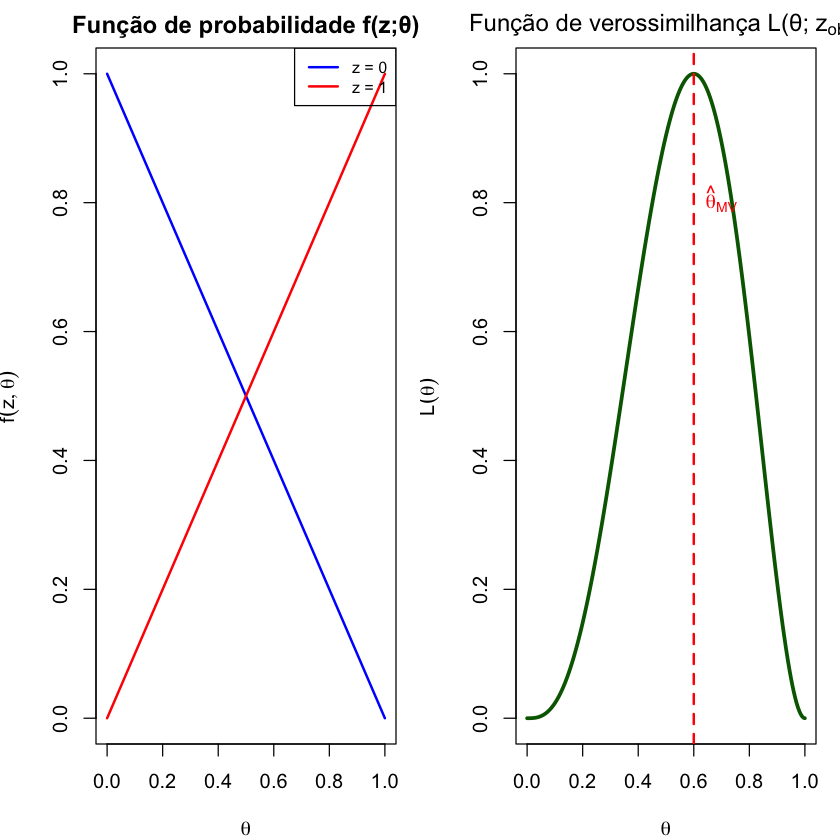

In [4]:
# ==========================================================
# Dados simulados e parâmetros
# ==========================================================
theta <- seq(0, 1, length.out = 200)
z_obs <- c(1, 1, 0, 1, 0)   # 3 sucessos em 5 → theta_chapeu = 0.6
n <- length(z_obs)
n1 <- sum(z_obs)

# ==========================================================
# Função de probabilidade f(z; theta)
# ==========================================================
f_z0 <- 1 - theta
f_z1 <- theta

# ==========================================================
# Função de verossimilhança L(theta; z_obs)
# ==========================================================
L <- theta^n1 * (1 - theta)^(n - n1)
L <- L / max(L)

# ==========================================================
# Plots lado a lado
# ==========================================================
par(mfrow=c(1,2), mar=c(4,4,2,1))

# Painel esquerdo – função de probabilidade
plot(theta, f_z0, type="l", col="blue", lwd=2, ylim=c(0,1),
     xlab=expression(theta), ylab=expression(f(z, theta)),
     main="Função de probabilidade f(z;θ)")
lines(theta, f_z1, col="red", lwd=2)
legend("topright", legend=c("z = 0", "z = 1"), col=c("blue","red"), lwd=2, cex=0.8)

# Painel direito – verossimilhança
plot(theta, L, type="l", col="darkgreen", lwd=3,
     xlab=expression(theta), ylab=expression(L(theta)),
     main=bquote("Função de verossimilhança L(θ; z"[obs]*")"))
abline(v = n1/n, col="red", lwd=2, lty=2)
text(n1/n, 0.8, expression(hat(theta)[MV]), pos=4, col="red")

# Mostrar dados observados (linha inferior com 0 e 1)
points(seq(0,1,length.out=n), rep(-0.05,n), pch=19, col=ifelse(z_obs==1,"red","blue"))
text(0.5, -0.15, paste("Dados observados:", paste(z_obs, collapse=" ")), cex=0.8)

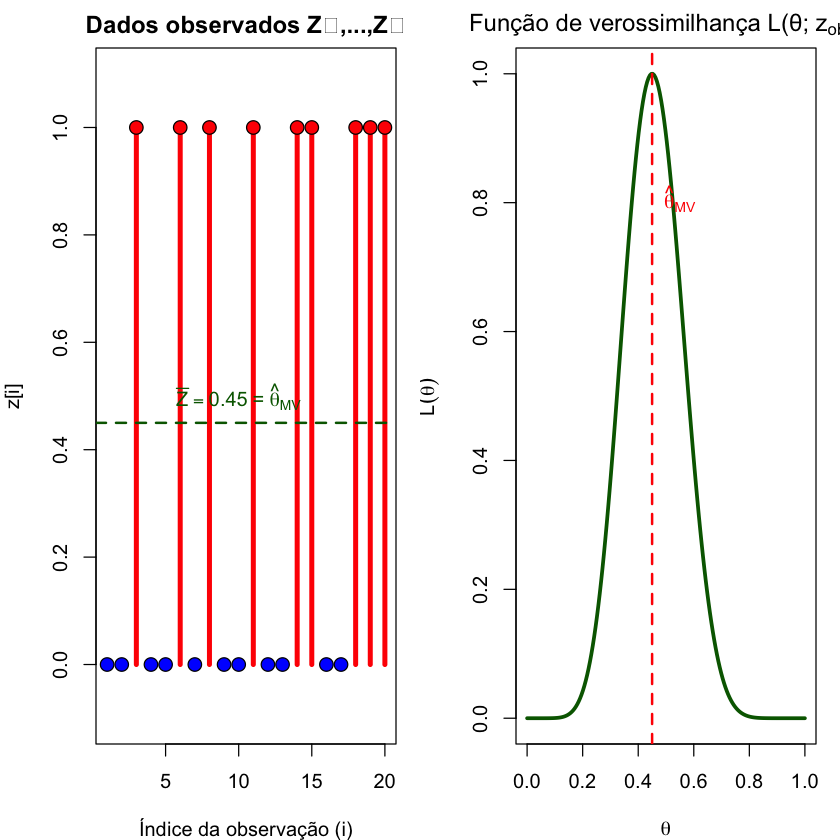

In [6]:
# ==========================================================
# 1. Gerar dados simulados
# ==========================================================
set.seed(42)
n <- 20
theta_true <- 0.6
z_obs <- rbinom(n, size=1, prob=theta_true)  # amostra Bernoulli

# Parâmetros derivados
n1 <- sum(z_obs)
theta <- seq(0, 1, length.out = 200)

# ==========================================================
# 2. Função de verossimilhança L(theta; z_obs)
# ==========================================================
L <- theta^n1 * (1 - theta)^(n - n1)
L <- L / max(L)

# ==========================================================
# 3. Plots lado a lado
# ==========================================================
par(mfrow=c(1,2), mar=c(4,4,2,1))

# ----------------------------------------------------------
# Painel esquerdo – Dados observados (0/1)
# ----------------------------------------------------------
plot(z_obs, type="h", lwd=4, col=ifelse(z_obs==1, "red", "blue"),
     ylim=c(-0.1,1.1), xlab="Índice da observação (i)",
     ylab="z[i]", main="Dados observados Z₁,...,Zₙ")
points(z_obs, pch=21, bg=ifelse(z_obs==1,"red","blue"), cex=1.5)
abline(h=mean(z_obs), col="darkgreen", lty=2, lwd=2)
text(n/2, mean(z_obs)+0.05,
     bquote(bar(Z) == .(round(mean(z_obs),2)) ~ "=" ~ hat(theta)[MV]),
     col="darkgreen")

# ----------------------------------------------------------
# Painel direito – Função de verossimilhança
# ----------------------------------------------------------
plot(theta, L, type="l", col="darkgreen", lwd=3,
     xlab=expression(theta), ylab=expression(L(theta)),
     main=bquote("Função de verossimilhança L(θ; z"[obs]*")"))
abline(v = mean(z_obs), col="red", lwd=2, lty=2)
text(mean(z_obs), 0.8, expression(hat(theta)[MV]), pos=4, col="red")